<a href="https://colab.research.google.com/github/ChristofferTan/JSC270/blob/main/JSC270_2024_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1: DELVE COVID data

## Learning objectives:

1.   Understanding the DELVE COVID-19 dataset and how it is displayed in the current notebook
2.   Modifying code to update figures
3.   Reading in, wrangling, and plotting data on your own!

# Part I: DELVE COVID-19 Data Visualization (20 pts)

###Go to https://rs-delve.github.io/data_software/global-dataset.html and read about the DELVE Global COVID-19 Dataset.

###Open the python notebook which was used to produce the data exploration on the DELVE website ([here](https://colab.research.google.com/github/rs-delve/covid19_datasets/blob/master/Data_Exploration.ipynb)) and review the code that was used.

###Now read the DELVE data into colab
####Hint: double clicking on the code cells in the DELVE colab, it will show you the code (i.e. the notebook is set to hide the code), you can copy that cell's content ant paste it in the code cell below

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output, display
import ipywidgets as widgets
from datetime import datetime, date, timedelta

path = 'https://raw.githubusercontent.com/rs-delve/covid19_datasets/master/dataset/combined_dataset_latest.csv'
df = pd.read_csv(path, parse_dates=['DATE'])
df

,ISO,DATE,country_name,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,...,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
0,ABW,2020-01-01,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17120.0,NaN,NaN,3.238519e-06,0.016900,220.264984,27.246809,26.732813,27.709375,9.019097
1,ABW,2020-01-02,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17120.0,NaN,NaN,6.755193e-07,0.016645,223.333893,27.049299,26.558985,27.508204,8.752604
2,ABW,2020-01-03,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17120.0,NaN,NaN,1.329184e-05,0.017244,220.742767,27.193014,26.695704,27.582422,8.564670
3,ABW,2020-01-04,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17120.0,NaN,NaN,1.788139e-07,0.016593,225.407074,27.267725,26.775782,27.771875,8.304688
4,ABW,2020-01-05,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17120.0,NaN,NaN,7.867813e-06,0.017142,219.864334,27.255766,26.965235,27.611719,5.604166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156140,ZWE,2022-04-10,Zimbabwe,2.0,2.0,1.0,3.0,0.0,2.0,2.0,...,2871820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156141,ZWE,2022-04-11,Zimbabwe,2.0,2.0,1.0,3.0,0.0,2.0,2.0,...,2871820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156142,ZWE,2022-04-12,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2871820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156143,ZWE,2022-04-13,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2871820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Explore the columns of the dataframe using .describe()

In [3]:
df.describe()

,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,...,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
count,152853.000000,152841.000000,152842.000000,152791.000000,152814.000000,152790.000000,152791.000000,152822.000000,152769.000000,152775.000000,...,1.369400e+05,4232.000000,608.000000,37720.000000,37720.000000,37720.000000,37720.000000,37720.000000,37720.000000,37720.000000
mean,1.491047,1.379205,1.341006,2.525967,0.529094,0.957419,0.775419,2.340246,0.762877,0.847233,...,6.933605e+06,118.685821,824.492783,0.000036,0.011411,189.244193,19.340536,15.662197,23.382182,3.510201
std,1.125447,0.969666,0.788743,1.548291,0.687834,0.924409,0.895428,1.216564,0.765605,0.856614,...,2.096006e+07,242.809764,1698.439041,0.000068,0.005347,64.843065,9.008982,9.374045,9.188666,1.844418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.130000e+03,-298.634510,-2090.441573,0.000000,0.000382,0.240429,-28.269835,-36.281255,-19.346130,0.781301
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,4.656155e+05,-5.085714,-37.800000,0.000001,0.006594,156.161128,13.695513,9.219760,18.128939,2.255559
50%,1.000000,2.000000,2.000000,3.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,...,1.512602e+06,43.527889,301.363483,0.000011,0.011403,202.137401,21.727503,17.443256,26.173631,3.034009
75%,3.000000,2.000000,2.000000,4.000000,1.000000,2.000000,2.000000,3.000000,1.000000,2.000000,...,5.448268e+06,164.988925,1152.323174,0.000043,0.016318,234.790844,26.429332,23.607332,29.594597,4.190054
max,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,...,2.004801e+08,1835.824117,12850.768820,0.002657,0.025842,389.408752,39.779094,35.386502,47.689189,19.476713


###Now create a new dataframe summarizing average values for each country in each column and display it in the notebook



In [4]:
df.groupby(["country_name"]).mean()

<ipython-input-4-053860a8d53a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["country_name"]).mean()


,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,...,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
country_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.233939,1.499394,1.128485,0.848485,0.696970,0.426667,0.448485,1.667879,0.000000,0.037576,...,9292896.0,NaN,NaN,0.000021,0.005995,185.438330,13.614276,7.350657,19.730927,2.427583
Albania,1.675373,1.319652,1.532338,3.164179,0.378109,1.529851,0.470149,1.713930,0.936567,1.046020,...,302886.0,NaN,NaN,0.000031,0.007237,179.588922,13.379447,8.698013,18.531704,2.181171
Algeria,1.356971,1.550481,1.554087,3.435096,1.235577,1.423077,0.906250,2.826923,0.393029,1.104567,...,7766182.0,NaN,NaN,0.000014,0.008208,193.742416,17.430347,12.708320,22.455916,3.471161
Andorra,1.078125,1.495192,1.259615,2.656250,0.783654,0.206731,0.051683,1.580529,1.793269,1.262019,...,NaN,NaN,NaN,0.000030,0.006175,177.429576,6.740901,1.786306,11.818287,1.703644
Angola,1.074789,1.835947,1.338963,2.880579,0.811821,1.148372,1.463209,2.867310,0.143546,0.221954,...,5698765.0,NaN,NaN,0.000036,0.016167,199.819331,24.547785,21.878891,27.995213,2.649455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,1.978182,1.922424,1.583030,2.958788,1.327273,1.318788,1.527273,3.202424,0.447273,0.489697,...,14309682.0,NaN,NaN,0.000038,0.016976,187.507023,25.915867,22.974523,29.811969,3.119722
"Virgin Islands, U.S.",1.833738,1.075243,0.898058,2.584951,0.120146,0.765777,0.330097,0.908981,0.649272,0.433252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,1.069091,0.766061,0.739394,0.000000,0.000000,1.436364,0.796364,2.395152,0.000000,0.000000,...,6417807.0,NaN,NaN,0.000017,0.012250,211.079073,22.518829,17.413003,28.410415,3.660751


###Copy the code which generates the "Timline of NPI Introduction for Selected Countries" graph and comment each command describing what was done, e.g.:



```
## add a column to plot_df which replaces the npi name with its enumerated index value
plot_df['value'] = plot_df.NPI.map({npi: i for i, npi in enumerate(npis)})
```



###Next, change the colors on the graph to group NPIs with the same color in the following way:
* all canceling/closures (e.g. "npi_cancel_public_events", "npi_school_closing","npi_close_public_transport", "npi_workplace_closing")
* all money-related interventions (e.g. "npi_income_support")
* all testing and PPE interventions (e.g. "npi_contact_tracing", "npi_masks")
* remaining NPIs (e.g. "npi_internal_movement_restrict")

######Hint: create a new column in plot_df that you can use for the 'hue' argument in the sns.relplot function

###Comment the code you added to make this change

### You can include your comments and change in the cell below.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


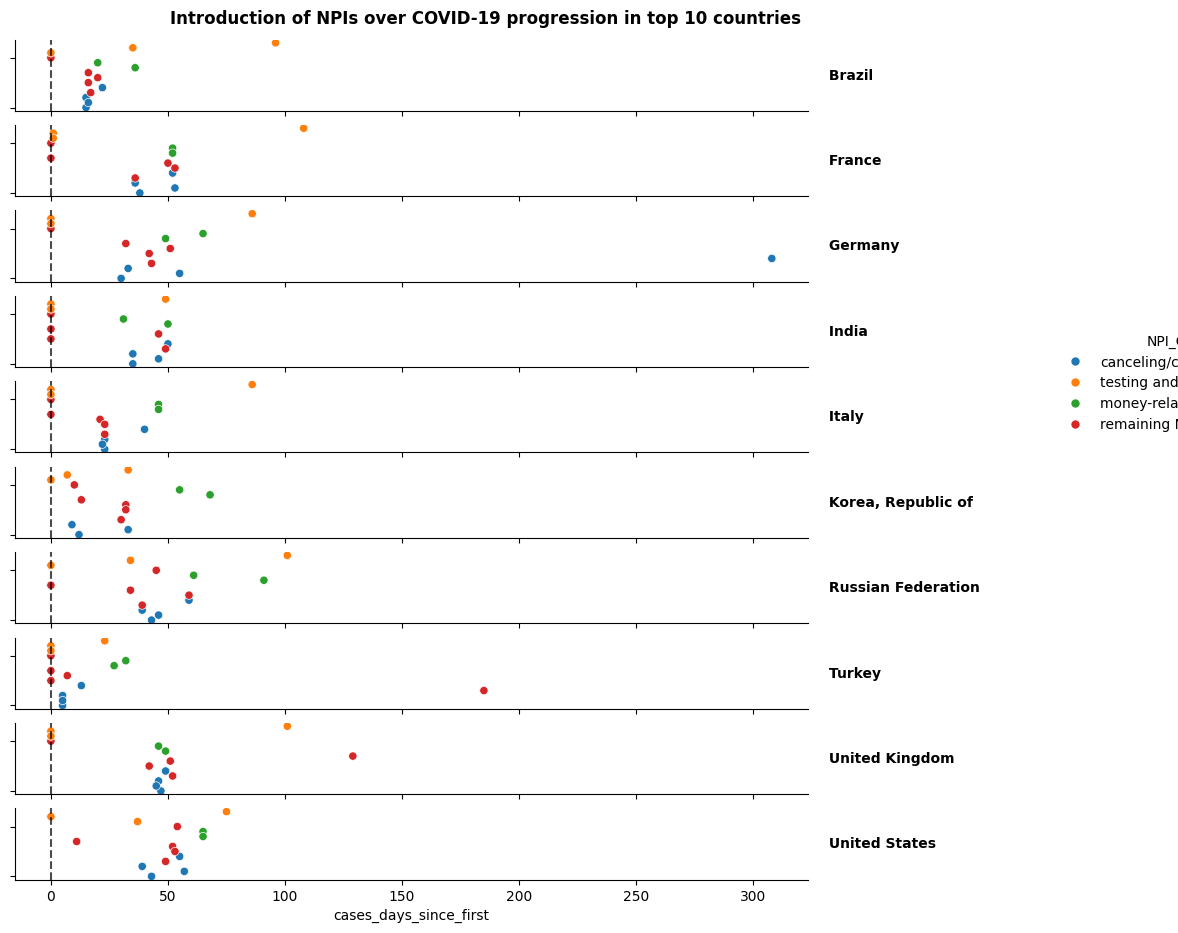

In [37]:
# List of the NPIs
npis = [
        'npi_school_closing',
        'npi_workplace_closing',
        'npi_cancel_public_events',
        'npi_gatherings_restrictions',
        'npi_close_public_transport',
        'npi_stay_at_home',
        'npi_internal_movement_restrictions',
        'npi_international_travel_controls',
        'npi_income_support',
        'npi_debt_relief',
        'npi_public_information',
        'npi_testing_policy',
        'npi_contact_tracing',
        'npi_masks',
]

# Select top 10 countries based on the maximum total cases
countries = df.groupby('country_name').cases_total.max().nlargest(10).index

# Create a new data frame for the top 10 countries with selected columns and melt it for better visualization
plot_df = df[df.country_name.isin(countries)][['country_name', 'cases_days_since_first'] + npis].melt(id_vars=['country_name', 'cases_days_since_first'], var_name='NPI')

# Sort the melted data frame based on the country name and days since the first case
plot_df = plot_df.sort_values(['country_name', 'cases_days_since_first'])

# Filter out rows where the value is less than or equal to zero and group the data frame based on the country_name and NPI with taking
# the minimum cases_days_since_first
plot_df = plot_df[plot_df['value'] > 0].groupby(['country_name', 'NPI'], as_index=False).min()
plot_df

# Map NPI names to enumerated index values and store the result in the 'value' column
plot_df['value'] = plot_df.NPI.map({npi: i for i, npi in enumerate(npis)})

# Define custom color groupings for NPIs
npi_categories = {
    'canceling/closures': ['npi_cancel_public_events', 'npi_school_closing', 'npi_close_public_transport', 'npi_workplace_closing'],
    'money-related interventions': ['npi_income_support', 'npi_debt_relief'],
    'testing and PPE interventions': ['npi_contact_tracing', 'npi_masks', 'npi_testing_policy'],
    'remaining NPIs': ['npi_gatherings_restrictions', 'npi_stay_at_home', 'npi_internal_movement_restrictions', 'npi_international_travel_controls', 'npi_public_information']
}
# Map NPIs to color groups in the DataFrame
plot_df['NPI_Group'] = plot_df['NPI'].map({npi: category for category, npis_in_category in npi_categories.items() for npi in npis_in_category})

# Create a scatter plot using Seaborn relplot
g = sns.relplot(
    data=plot_df,
    x='cases_days_since_first',
    y='value',
    hue='NPI_Group',
    row='country_name',
    kind='scatter',
    height=1,
    aspect=10,
    marker='o',
    facet_kws=dict(margin_titles=True, legend_out=True, despine=True)
)

# Loop through each subplot to add annotations
for ax in g.axes.flat:
    txt = ax.texts[0]
    ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
            txt.get_text().split('=')[1],
            transform=ax.transAxes,
            va='center',
            fontweight='bold')
    ax.texts[0].remove()
    ax.set_ylabel(None)
    ax.set_yticklabels([])
    ax.axvline(0, ls='--', c='k', alpha=0.7)

# Add a super title to the entire figure
g.fig.suptitle('Introduction of NPIs over COVID-19 progression in top 10 countries', fontweight='bold')

# Adjust legend position
leg = g._legend
leg.set_bbox_to_anchor([1.05, 0.55])

# Adjust the layout to prevent overlapping
plt.subplots_adjust(top=0.95)

# Show the plot
plt.show()


###In the DELVE data exploration, they add a widget to allow the user to select only data from a specific country to display. Let's add a widget here and only show the data from one country. It's okay if your country-specific graph is simpler than the ones above (e.g. no dashed horizontal line).

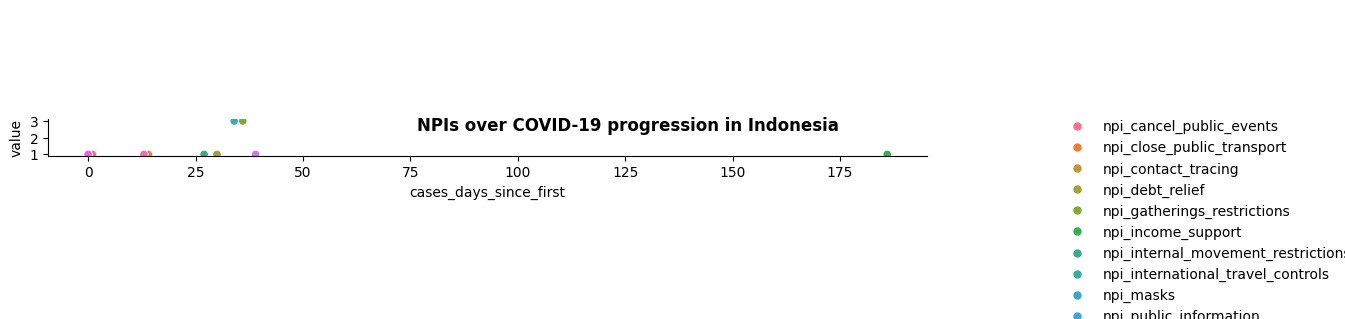

In [40]:
# Create a scatter plot using Seaborn relplot
g = sns.relplot(
    data=indonesia_df,
    x='cases_days_since_first',
    y='value',
    hue='NPI',
    kind='scatter',
    height=1,
    aspect=10,
    marker='o',
    facet_kws=dict(margin_titles=True, legend_out=True, despine=True)
)

# Add a custom label to each subplot
for ax in g.axes.flat:
    legend = ax.get_legend()
    if legend:
        title_text = legend.get_title().get_text()
        txt = ax.text(0.5, 1.05, f"NPI={title_text}",
                      transform=ax.transAxes,
                      va='center',
                      ha='center',
                      fontweight='bold')

# Remove the default legend title
g._legend.set_title('')

# Add a super title to the entire figure
g.fig.suptitle('NPIs over COVID-19 progression in Indonesia', fontweight='bold')

# Adjust legend position
leg = g._legend
leg.set_bbox_to_anchor([1.05, 0.55])

# Adjust the layout to prevent overlapping
plt.subplots_adjust(top=0.95)

# Show the plot
plt.show()

# Part II: Create your own COVID-19 Data Visualization
* 20 pts for the code + description in this notebook
* 20 pts for the 2 pg summary

###Now find a COVID-19 dataset available online on your own.  Feel free to use whatever data you would like.  If you are having trouble finding data, you can take a look at the sources below:

* The U of T library COVID-19 data resource list: https://mdl.library.utoronto.ca/covid-19/data.

* Google open COVID-19 data repository: https://health.google.com/covid-19/open-data/raw-data.

* Ontario data catalog: https://data.ontario.ca/en/organization/health.

* Kaggle: https://www.kaggle.com.

###Read the data into this notebook and create a figure with a widget that allows users to interact with the graph.  Also, write a caption in the notebook describing the figure you've created.



### Write a 2-page, double spaced report with the following sections:
* Background: Description of the data you found
* Motivation:  Goal of your visualization
* Methods:  A summary of the visualization you created of the data
* Conclusion: Conclusions or findings indicated by the visualization you have created

### When you are finished, turn in this notebook and the pdf of your report to Quercus.


